In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [15]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


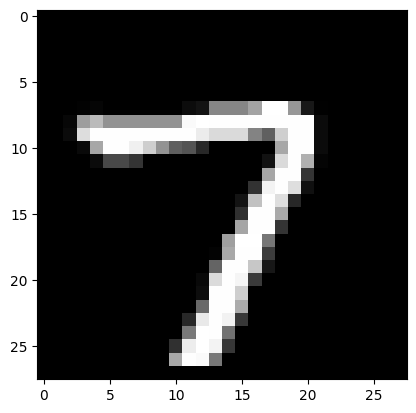

Label:  7
Max value:  254


In [17]:
sample_id = np.random.randint(60000)
plt.imshow(x_train[sample_id], cmap="gray")
plt.show()
print("Label: ", y_train[sample_id])
print("Max value: ", np.max(x_train[sample_id]))

In [18]:
num_classes = 10

x_train = x_train / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)

x_test = x_test / 255.0
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

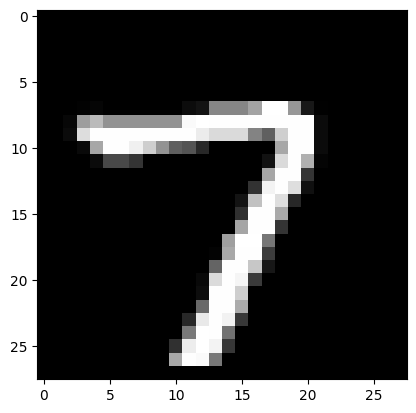

Label:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Max value:  0.996078431372549


In [19]:
plt.imshow(x_train[sample_id], cmap="gray")
plt.show()
print("Label: ", y_train[sample_id])
print("Max value: ", np.max(x_train[sample_id]))

In [20]:
#converting 2D image to 3D volume

x_train = np.expand_dims(x_train, axis=-1) # (28, 28) -> (28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1) # (28, 28) -> (28, 28, 1)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [22]:
img_rows, img_cols = 28, 28
num_channels = 1
input_shape = (img_rows, img_cols, num_channels)

In [23]:
14*14*16

3136

In [24]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (5, 5),
                                 strides=(1, 1),
                                 activation='relu',
                                 padding='same',
                                 input_shape=input_shape,
                                 name="cse428"))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Flatten())
#>>>>>>>>>>>> 3136
model.add(tf.keras.layers.Dense(100, activation='relu'))
#>>>>>>>>>>>> 313600 connections: shape here 100
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7692 - loss: 0.8121 - val_accuracy: 0.9265 - val_loss: 0.2500
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9283 - loss: 0.2383 - val_accuracy: 0.9448 - val_loss: 0.1757
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9511 - loss: 0.1673 - val_accuracy: 0.9633 - val_loss: 0.1232
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9593 - loss: 0.1387 - val_accuracy: 0.9678 - val_loss: 0.1053
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9682 - loss: 0.1093 - val_accuracy: 0.9642 - val_loss: 0.1084
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9717 - loss: 0.0952 - val_accuracy: 0.9728 - val_loss: 0.0900
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9750 - loss: 0.0825 - val_accuracy: 0.9751 - val_loss: 0.0791
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9787 - loss: 0.0726 

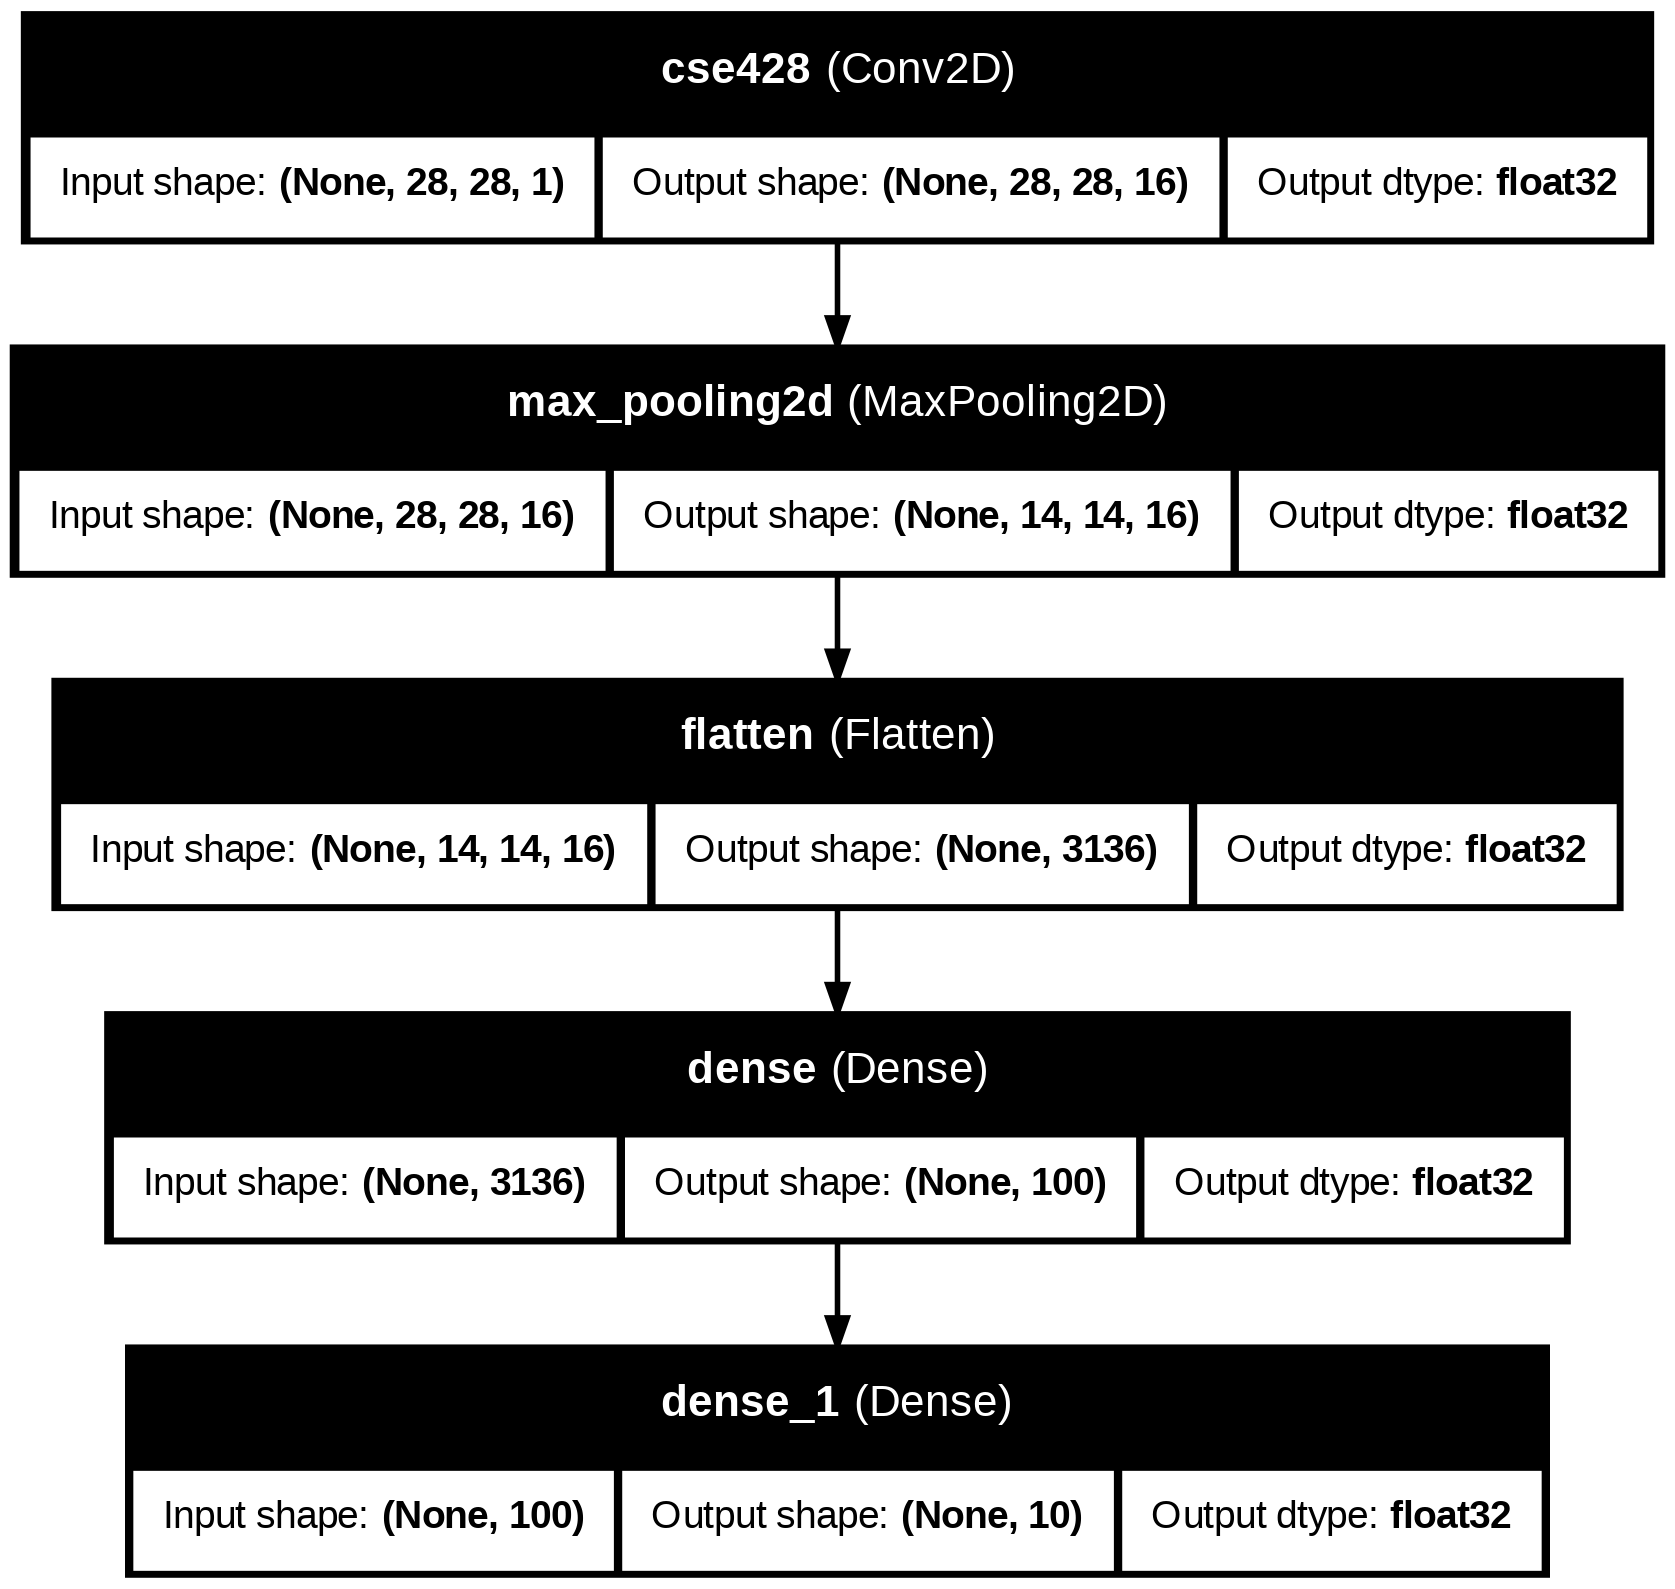

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)